# MedCellTypes - YOLO Batch Inference

## Batch Inference (Without Model Serving)

In [0]:
%pip install -U ultralytics==8.3.40 opencv-python==4.10.0.84 ray==2.39.0
dbutils.library.restartPython()

  Obtaining dependency information for ultralytics==8.3.40 from https://files.pythonhosted.org/packages/a8/58/94b0b297a3ce89c355be544998046ba6cdebbf6de1161a41001e0e299493/ultralytics-8.3.40-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python==4.10.0.84 from https://files.pythonhosted.org/packages/3f/a4/d2537f47fd7fcfba966bd806e3ec18e7ee1681056d4b0a9c8d983983e4d5/opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for ray==2.39.0 from https://files.pythonhosted.org/packages/1d/c6/6dd145b3952d1454793056849292c6f8b9e1cf4b010cbd3536ef154d9ea1/ray-2.39.0-cp311-cp311-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for ultralytics-thop>=2.0.0 from https://files.pythonhosted.org/packages/a6/10/251f036b4c5d77249f9a119cc89dafe8745dc1ad1f1a5f06b6a3988ca454/ultralytics_thop-2.0.14-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/898.5 kB ? eta -:--:--
  

## Both model flavour A and B will work
1. A. Pytorch flavour model logging and loading
2. B. Pyfunc custom wrapper model logging and loading

In [0]:
# load model back
import mlflow
import ultralytics

model_uri = 'runs:/7d7584ec603e4994b746582c64ca76aa/model' # this is pytorch flavour model
# Replace INPUT_EXAMPLE with your own input example to the model
# A valid input example is a data instance suitable for pyfunc prediction
test_path = "/Volumes/mmt_mlops_demos/cv/data/Nuclei_Instance_Dataset/yolo_dataset/val/images/"
input_data = [test_path + f for f in ["human_liver_39.png", "human_melanoma_05.png", "mouse_liver_35.png", "mouse_spleen_02.png"]]
print("We will inference on the following images:", input_data)
model = mlflow.pytorch.load_model(model_uri) # for pytorch flavour model, load using mlflow.pytorch
results = model(input_data, stream=False) # enable stream produces a generator instead of a list. a List consumes more memory.

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
We will inference on the following images: ['/Volumes/mmt_mlops_demos/cv/data/Nuclei_Instance_Dataset/yolo_dataset/val/images/human_liver_39.png', '/Volumes/mmt_mlops_demos/cv/data/Nuclei_Instance_Dataset/yolo_dataset/val/images/human_melanoma_05.png', '/Volumes/mmt_mlops_demos/cv/data/Nuclei_Instance_Dataset/yolo_dataset/val/images/mouse_liver_35.png', '/Volumes/mmt_mlops_demos/cv/data/Nuclei_Instance_Dataset/yolo_dataset/val/images/mouse_spleen_02.png']



0: 640x640 41 Nucleis, 36.7ms
1: 640x640 43 Nucleis, 36.7ms
2: 640x640 21 Nucleis, 36.7ms
3: 640x640 300 Nucleis, 36.7ms
Speed: 3.8ms preprocess, 36.7ms inference, 144.5ms postprocess per image at shape (1, 3, 640, 640)


In [0]:
# load model back
import mlflow
import ultralytics

model_uri = 'runs:/4a8cef6f866d414096370c4282dbf55f/model' # this is pyfunc customized model
# Replace INPUT_EXAMPLE with your own input example to the model
# A valid input example is a data instance suitable for pyfunc prediction
test_path = "/Volumes/mmt_mlops_demos/cv/data/Nuclei_Instance_Dataset/yolo_dataset/val/images/"
input_data = [test_path + f for f in ["human_liver_39.png", "human_melanoma_05.png", "mouse_liver_35.png", "mouse_spleen_02.png"]]
print("We will inference on the following images:", input_data)
model = mlflow.pyfunc.load_model(model_uri) # for pytorch flavour model, load using mlflow.pytorch
results = model.unwrap_python_model().model(input_data, stream = False) # enable stream produces a generator instead of a list. a List consumes more memory.

We will inference on the following images: ['/Volumes/mmt_mlops_demos/cv/data/Nuclei_Instance_Dataset/yolo_dataset/val/images/human_liver_39.png', '/Volumes/mmt_mlops_demos/cv/data/Nuclei_Instance_Dataset/yolo_dataset/val/images/human_melanoma_05.png', '/Volumes/mmt_mlops_demos/cv/data/Nuclei_Instance_Dataset/yolo_dataset/val/images/mouse_liver_35.png', '/Volumes/mmt_mlops_demos/cv/data/Nuclei_Instance_Dataset/yolo_dataset/val/images/mouse_spleen_02.png']

0: 640x640 33 Nucleis, 3.2ms
1: 640x640 48 Nucleis, 3.2ms
2: 640x640 15 Nucleis, 3.2ms
3: 640x640 289 Nucleis, 3.2ms
Speed: 2.7ms preprocess, 3.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


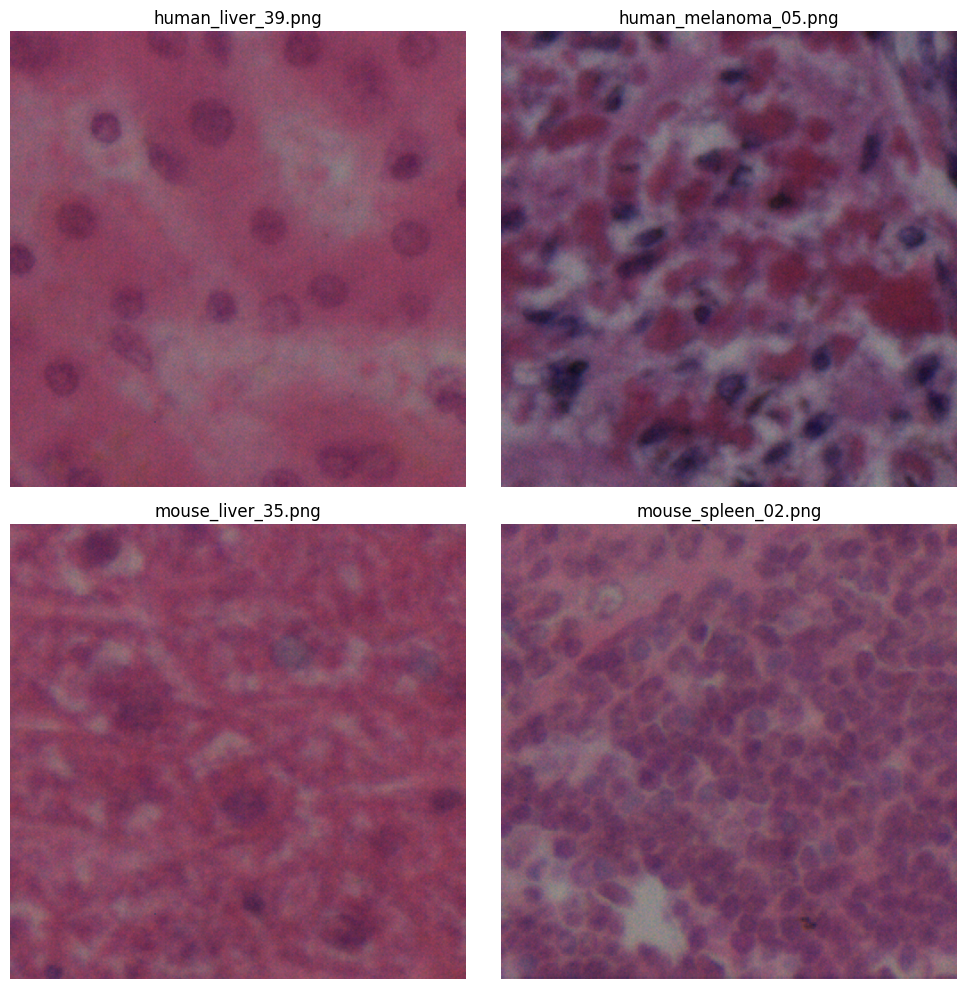

In [0]:
import cv2
import matplotlib.pyplot as plt
import math

nrow = math.ceil(len(input_data) / 2)

fig, axs = plt.subplots(nrow, 2, figsize=(10, 10))
for ax, img_loc in zip(axs.flatten(), input_data):
    img = cv2.imread(img_loc)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(img_loc.split("/")[-1])
    ax.axis('off')

plt.tight_layout()

# display(fig)

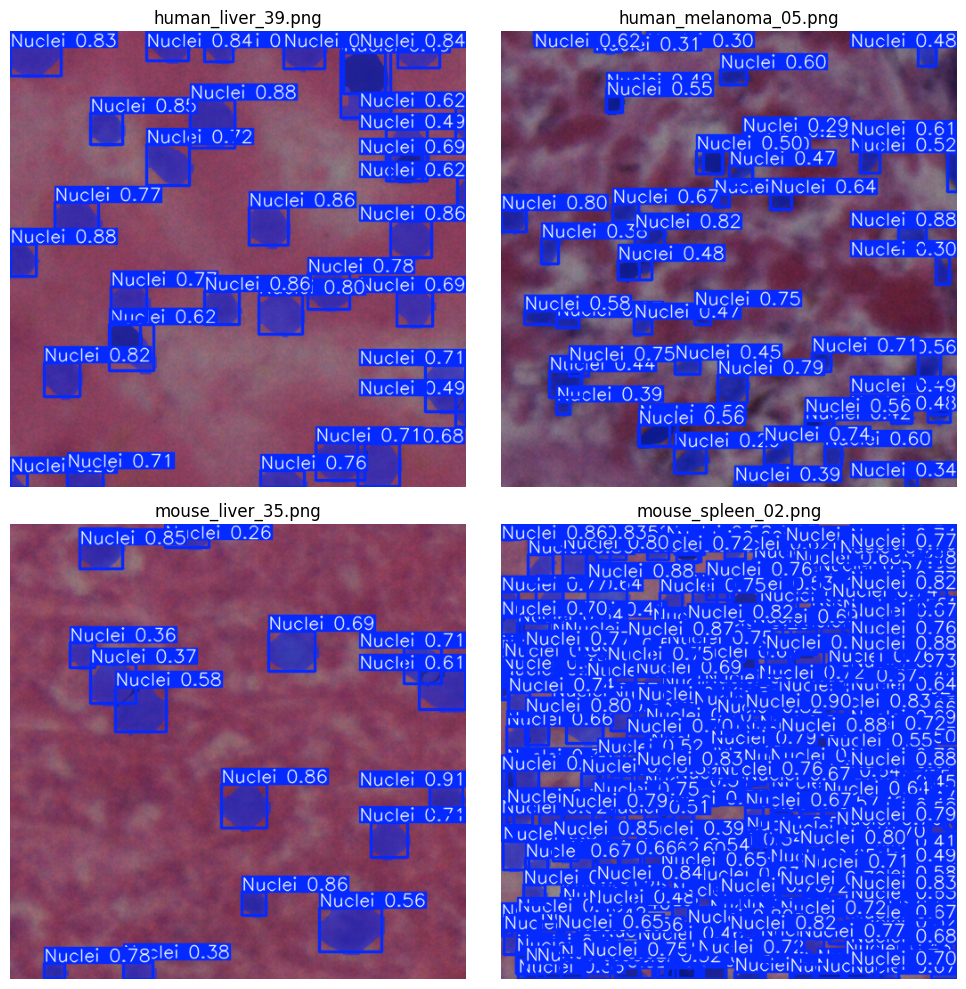

In [0]:
fig, axs = plt.subplots(nrow, 2, figsize=(10, 10))
for ax, result in zip(axs.flatten(), results):
    img_w_predictions = result.plot()
    img_rgb = cv2.cvtColor(img_w_predictions, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(result.path.split("/")[-1])
    ax.axis('off')

plt.tight_layout()

In [0]:
len(results)

4

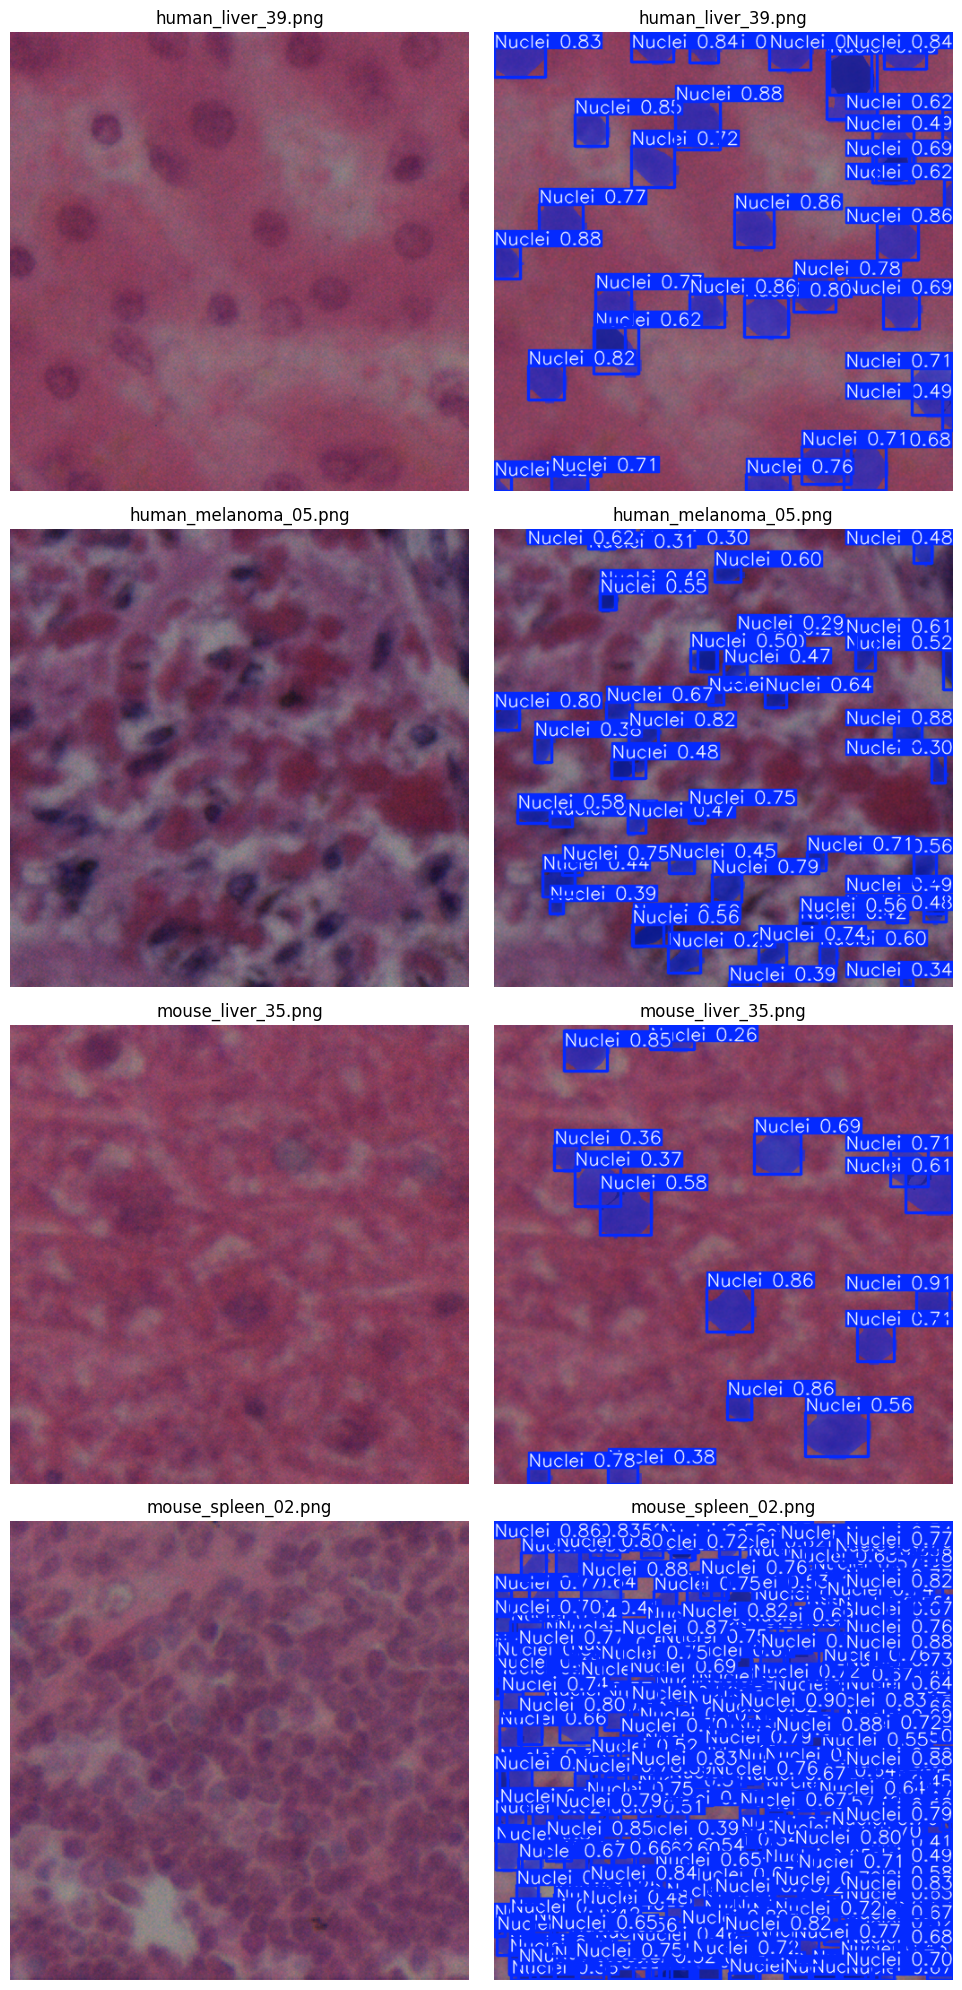

In [0]:
fig, axs = plt.subplots(len(results), 2, figsize=(10, 20)) #, gridspec_kw={'wspace': 0.01, 'hspace': 0.01})
for ax, result in zip(axs, results):
    # for the same row, original figure vs. original+overlay from prediction figure
    ax_L = ax[0] # left subplot
    ax_R = ax[1] # right subplot

    img_raw = result.orig_img
    img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
    ax_L.imshow(img_rgb)
    ax_L.set_title(result.path.split("/")[-1])
    ax_L.axis('off')

    img_w_predictions = result.plot()
    img_rgb = cv2.cvtColor(img_w_predictions, cv2.COLOR_BGR2RGB)
    ax_R.imshow(img_rgb)
    ax_R.set_title(result.path.split("/")[-1])
    ax_R.axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0.1, hspace=0.1)

### You can always do more things with raw numerical results such as coordinates from the inference

In [0]:
# View results
for r in results:
    print(r.boxes[:1])
    print(r.masks[:1])

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8793], device='cuda:0')
data: tensor([[1.2061e-02, 2.3951e+02, 2.9581e+01, 2.7570e+02, 8.7933e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (512, 512)
shape: torch.Size([1, 6])
xywh: tensor([[ 14.7963, 257.6067,  29.5685,  36.1896]], device='cuda:0')
xywhn: tensor([[0.0289, 0.5031, 0.0578, 0.0707]], device='cuda:0')
xyxy: tensor([[1.2061e-02, 2.3951e+02, 2.9581e+01, 2.7570e+02]], device='cuda:0')
xyxyn: tensor([[2.3556e-05, 4.6780e-01, 5.7775e-02, 5.3848e-01]], device='cuda:0')
ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')
orig_shape: (512, 512)
shape: torch.Si